In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.metrics import*
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder

In [188]:
plt.style.use('seaborn')
sn.set(font_scale=2.5)

In [189]:
train = pd.read_csv('mushrooms.csv')

In [190]:
train.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [191]:
#class_mapping = {"p" : 0, "e" : 1}
#train['class'] = train['class'].map(class_mapping)

In [192]:
#training = pd.DataFrame(data=np.c_[train['data'], train['target']],columns = train['feature_names'] + ['target'])
#training['target'] = training['target'].map({0:"p",1:"e"})
X = train.iloc[:,:-1]
Y = train.iloc[:,[-1]]
train.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [193]:

labelencoder=LabelEncoder()
for column in train.columns:
    train[column] = labelencoder.fit_transform(train[column])

In [194]:
train.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


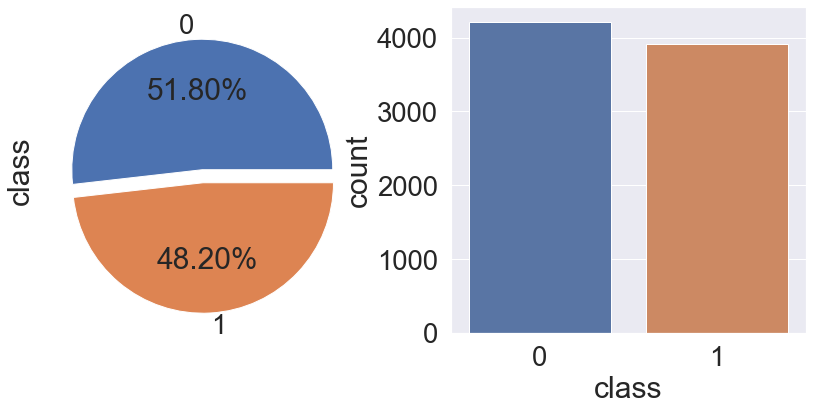

In [195]:
#1)subplot
figure,ax = plt.subplots(1,2,figsize = (14,6)) #(num of rows, num of cols, figure sizes respectively)
train["class"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.2f%%", ax=ax[0])#,shadow=True). ax[0] referring to the first figure
#2) counterplot on the right side
sn.countplot("class",data=train, ax=ax[1])#ax[1] referring to the figure on the second row

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

features = train.drop(['class','bruises','odor','gill-attachment','gill-spacing'], axis=1).values #axis=1 refering to the features. horizontal.
target_label = train['class'].values

In [197]:
x_train, x_valid, y_train, y_valid = train_test_split(features, target_label, test_size = 0.2, random_state = 20)
y_train.shape, y_valid.shape, x_train.shape, x_valid.shape

((6499,), (1625,), (6499, 18), (1625, 18))

In [198]:
#training.dtypes

In [199]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
prediction = model.predict(x_valid)

In [200]:
prediction

array([0, 1, 0, ..., 1, 1, 0])

In [201]:
print('Number of test data: {} \naccuracy: {:.2f}% '.format(y_valid.shape[0], 100 * accuracy_score(y_valid,prediction)))

Number of test data: 1625 
accuracy: 93.97% 


In [202]:
confusion_matrix(y_valid,prediction)

array([[811,  41],
       [ 57, 716]], dtype=int64)

In [203]:
print('Precision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100*precision_score(y_valid,prediction),
                                                                         100*recall_score(y_valid,prediction),100*f1_score(y_valid,prediction)))

Precision: 94.58% 
Recall: 92.63% 
F1-score: 93.59% 


In [204]:
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(x_valid)[:,1] > i
    cf_mtx = confusion_matrix(y_valid, pred)
    accuracy = accuracy_score(y_valid, pred)
    f1 = f1_score(y_valid, pred)
    list.append([i, accuracy, f1])

cut_off = DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1"]
cut_off

,CUTOFF,ACC,F1
0,0.000000,0.475692,0.644704
1,0.010101,0.587692,0.697380
2,0.020202,0.631385,0.719438
3,0.030303,0.669538,0.740705
4,0.040404,0.699692,0.758416
...,...,...,...
95,0.959596,0.763077,0.676742
96,0.969697,0.729231,0.612676
97,0.979798,0.690462,0.530345
98,0.989899,0.619077,0.347734


In [205]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()]

,CUTOFF,ACC,F1
37,0.373737,0.944,0.941779
40,0.404040,0.944,0.941554


In [206]:
cut_off_ACC_MAX = cut_off[cut_off["ACC"] == cut_off["ACC"].max()]["CUTOFF"][40]
pred_ACC_MAX = model.predict_proba(x_valid)[:,1] > cut_off_ACC_MAX

In [207]:
confusion_matrix(y_valid,pred_ACC_MAX)

array([[801,  51],
       [ 40, 733]], dtype=int64)